In [7]:
#Load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

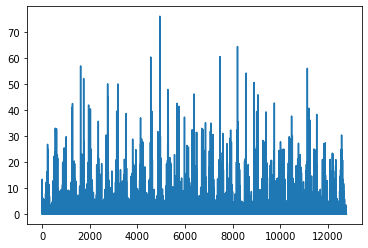

In [8]:
#Load data
file_path = '/home/NearingLab/data/camels_data/basin_dataset_public_v1p2/basin_mean_forcing/daymet/09/05062500_lump_cida_forcing_leap.txt'
df = pd.read_csv(file_path, sep='\s+', header=3)
plt.plot(df['prcp(mm/day)'])
prcp = df['prcp(mm/day)'].values

In [9]:
prcp.shape

(12784,)

In [11]:
#Define model
a = 0.4
b = 0.2
c = 0.6
groundwater = np.full(prcp.shape,0)
streamflow = np.full(prcp.shape,np.nan)
for t in range(1, prcp.shape[0]):
    streamflow[t] = (1-a-b)*prcp[t]+(c*groundwater[t-1])
    groundwater[t] = (1-c)*groundwater[t-1]+(a*prcp[t])

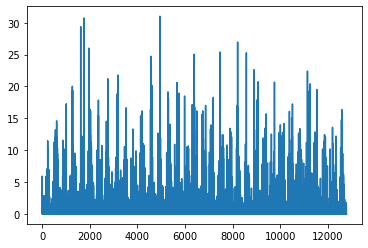

In [12]:
plt.plot(streamflow)